In [10]:
import xarray as xr
import rioxarray
from pathlib import Path
import rasterio
time_series_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/cms_workshop/"
nasa_stats_name = 'WY_2023_2024_SuomiNPP_nasa_class_distribution.nc'
meteofrance_stats_name = 'WY_2023_2024_SuomiNPP_meteofrance_class_distribution.nc'

meteofrance_stats_path= Path(f"{time_series_folder}").joinpath(meteofrance_stats_name)
nasa_stats_path= Path(f"{time_series_folder}").joinpath(nasa_stats_name)

meteofrance_ds = xr.open_dataset(meteofrance_stats_path)
nasa_ds = xr.open_dataset(nasa_stats_path)

In [2]:
from typing import List
from matplotlib.axes import Axes
import pandas as pd
import xarray as xr

def print_table( year_stats_data_array: xr.DataArray, classes_to_print: List[str] | str = "all"):
    year_data_frame = year_stats_data_array.to_pandas()
    pd.options.display.float_format = "{:.3f}".format
    pd.options.display.precision = 3
    if classes_to_print == "all":
        classes_to_print = year_stats_data_array.coords["class_name"].values
    print(year_data_frame)

def classes_bar_distribution(
    year_stats_data_array: xr.DataArray, classes_to_plot: List[str] | str = "all", ax: Axes | None = None
) -> None:
    year_data_frame = year_stats_data_array.to_pandas()
    if classes_to_plot == "all":
        classes_to_plot = year_data_frame.index

    year_data_frame = year_data_frame.transpose()
    year_data_frame.index = year_data_frame.index.strftime("%B")
    year_data_frame[classes_to_plot].plot.bar(title=f"Class distribution for year ", ax=ax)


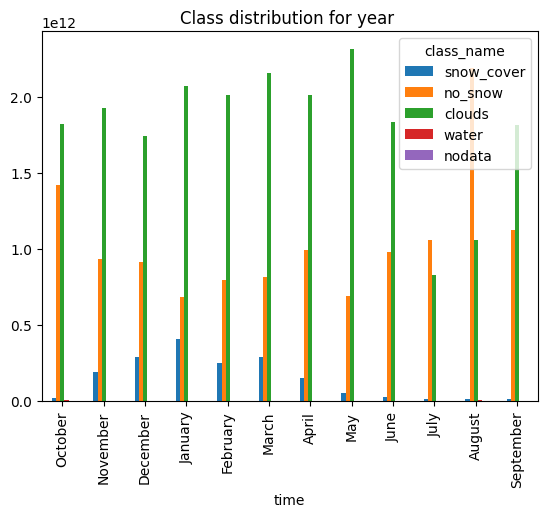

In [16]:
classes_bar_distribution(nasa_ds['class_distribution_area'])

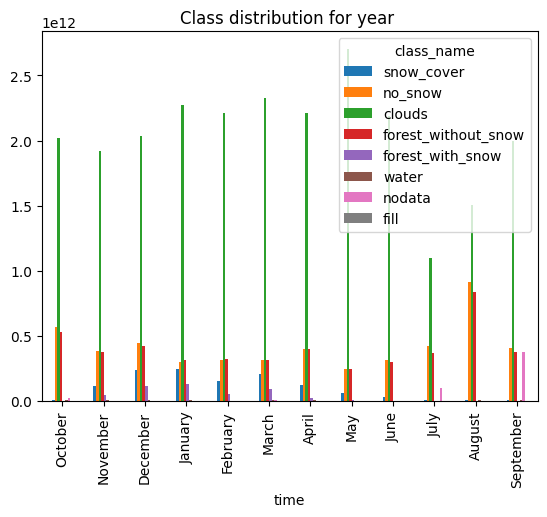

In [14]:
classes_bar_distribution(meteofrance_ds['class_distribution_area'])

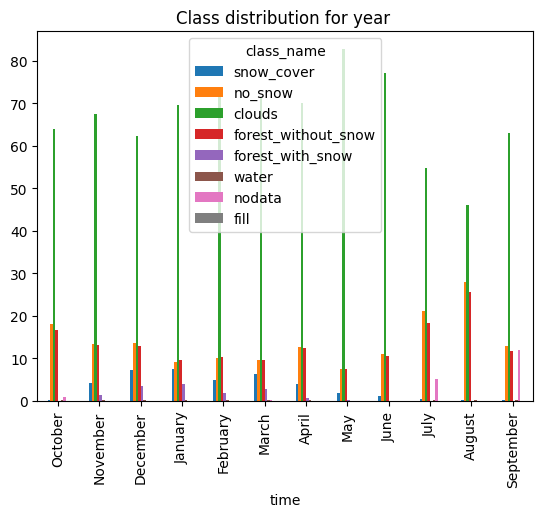

In [15]:
classes_bar_distribution(meteofrance_ds['class_distribution_percentage'])

In [13]:
nasa_ds.n_observed_days.values

array([31, 29, 28, 30, 29, 31, 30, 29, 27, 19, 31, 28])